In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [156]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [157]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [158]:
sr=pd.to_datetime(df['Date'])

In [159]:
sr

0      2015-04-22
1      2015-04-08
2      2015-04-18
3      2015-05-07
4      2015-05-26
          ...    
2219   2015-04-02
2220   2015-06-02
2221   2015-06-09
2222   2015-06-23
2223   2015-06-24
Name: Date, Length: 2224, dtype: datetime64[ns]

In [160]:
df['months']=sr.dt.month


In [289]:
u=df['months']

In [290]:
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,months
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,4
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,6
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6


In [163]:
df['Ticket #'].count()


2224

# Trend line showing the number of complaints by months

In [368]:
x=[4,5,6]
y=df.groupby(['months'])['Customer Complaint'].count()


In [462]:
y.max()

1280

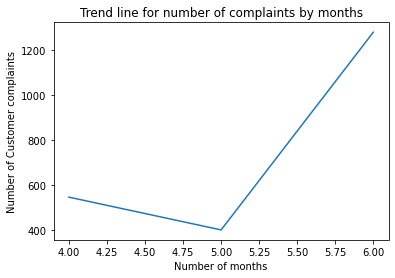

In [451]:
plt.plot(x,y)
plt.xlabel('Number of months')
plt.ylabel('Number of Customer complaints')
plt.title('Trend line for number of complaints by months')
plt.savefig("Number of complaints vs months.jpg")

# Trend as per the date for number of complaint

In [365]:
x1=df['Date'].unique()


In [366]:
y1=df.groupby(['Date'])['Customer Complaint'].count()

In [461]:
y1.max()

218

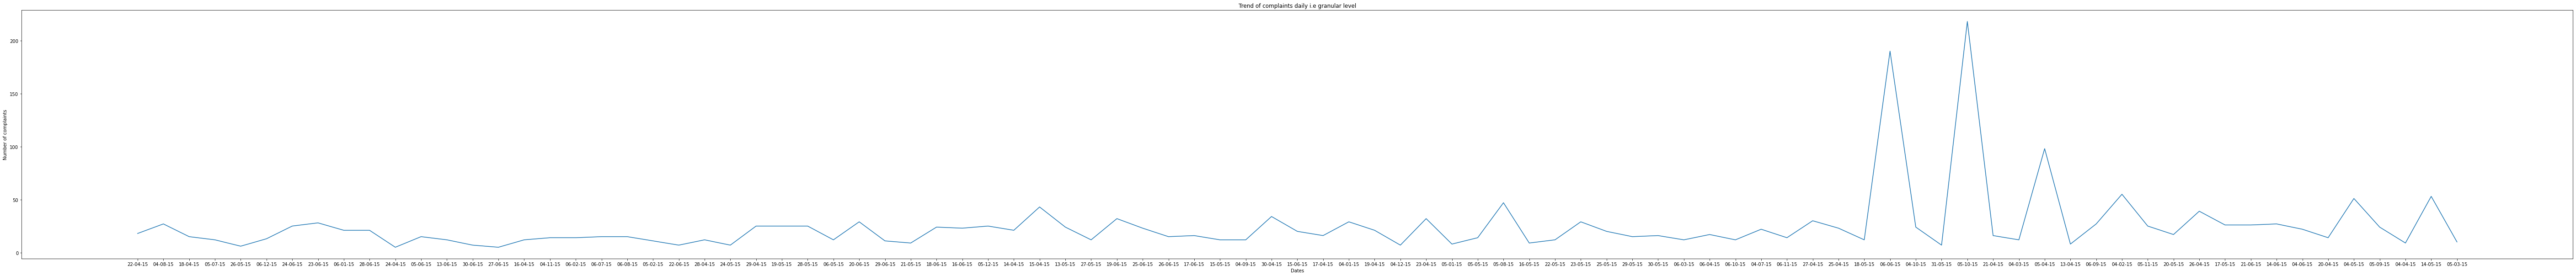

In [454]:
plt.figure(figsize=(100,10))
plt.plot(x1,y1)
plt.xlabel('Dates')
plt.ylabel('Number of complaints')
plt.title('Trend of complaints daily i.e granular level')
plt.savefig("Number of complaints vs day.jpg")

# Frequenct table for types of complaints

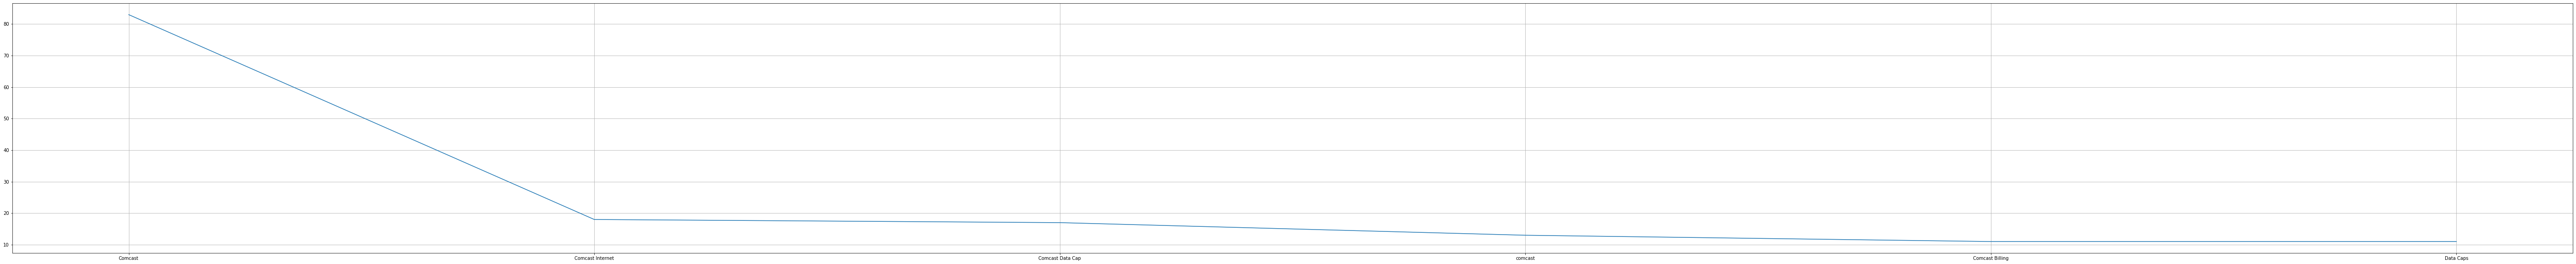

In [455]:

df['Customer Complaint'].value_counts().nlargest(6).plot(kind='line',figsize=(100,10))
plt.grid()
plt.savefig('Frequency distribution for the top 6 types of customer complaints.jpg')

In [169]:
df['Customer Complaint'].value_counts()


Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

# Comcast is the  one with maximum complain type

In [431]:
df2= pd.read_csv("Comcast_telecom_complaints_data.csv")

In [432]:
df2.drop_duplicates(keep=False)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [433]:
df2['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

# So now going to change it to pending to open and solved to closed

In [434]:
df2['Status'].replace({'Pending':'Open','Solved':'Closed'})

0       Closed
1       Closed
2       Closed
3         Open
4       Closed
         ...  
2219    Closed
2220    Closed
2221    Closed
2222    Closed
2223      Open
Name: Status, Length: 2224, dtype: object

In [435]:
df2['Status'].replace({'Pending':'Open','Solved':'Closed'},inplace=True)

In [436]:
df2

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Closed,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Closed,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Closed,No


In [438]:
df2=df2.replace(['District Of Columbia'],'District of Columbia')

# stacked plot

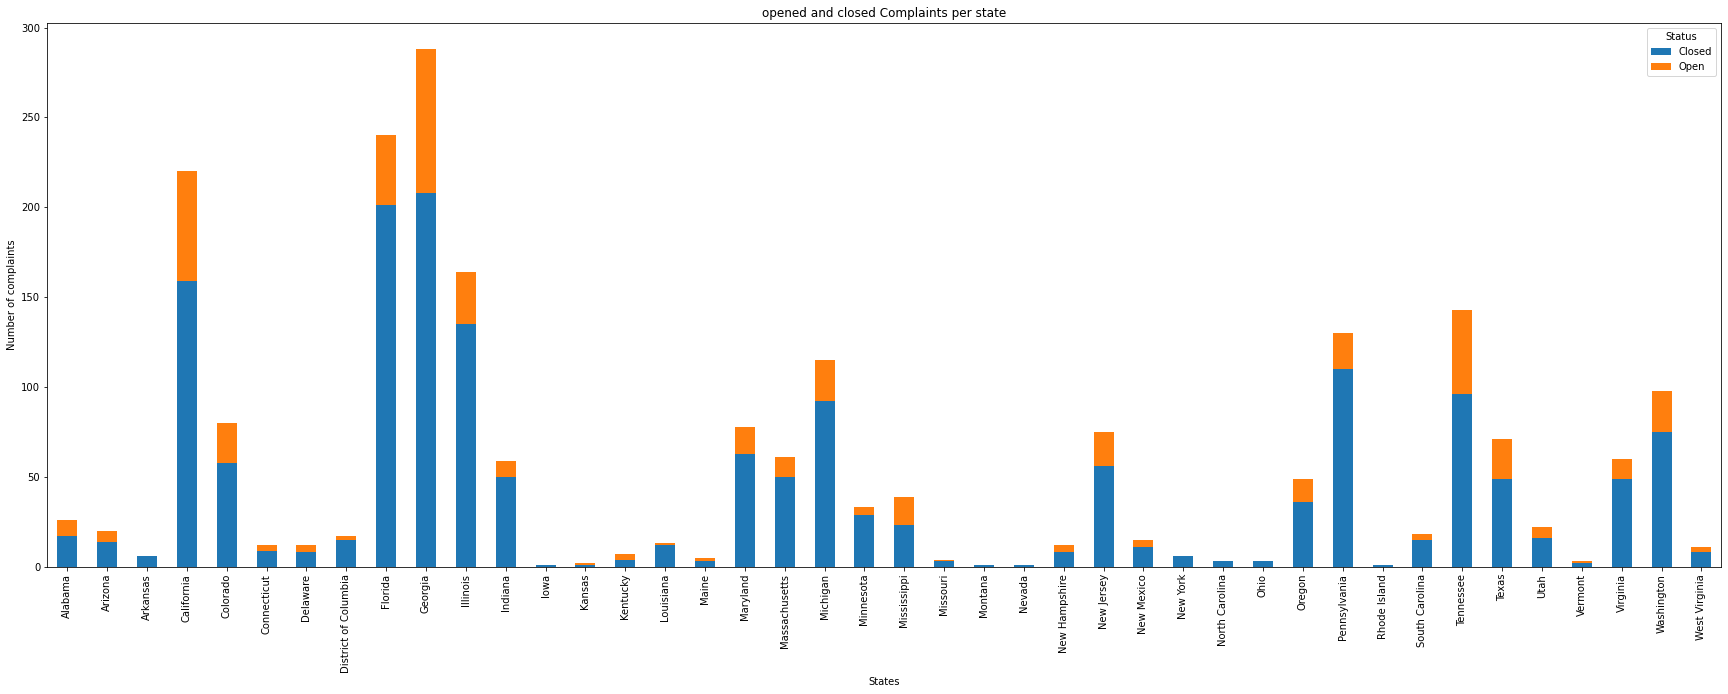

In [458]:
st=df2.groupby(['State'])['Status'].value_counts().unstack()

st.plot(kind="bar",stacked=True,figsize=(30,10))
plt.xlabel('States')
plt.ylabel('Number of complaints')
plt.title('opened and closed Complaints per state')
plt.savefig("Opened and closed status  vs state.jpg")

# State with maximum complaints

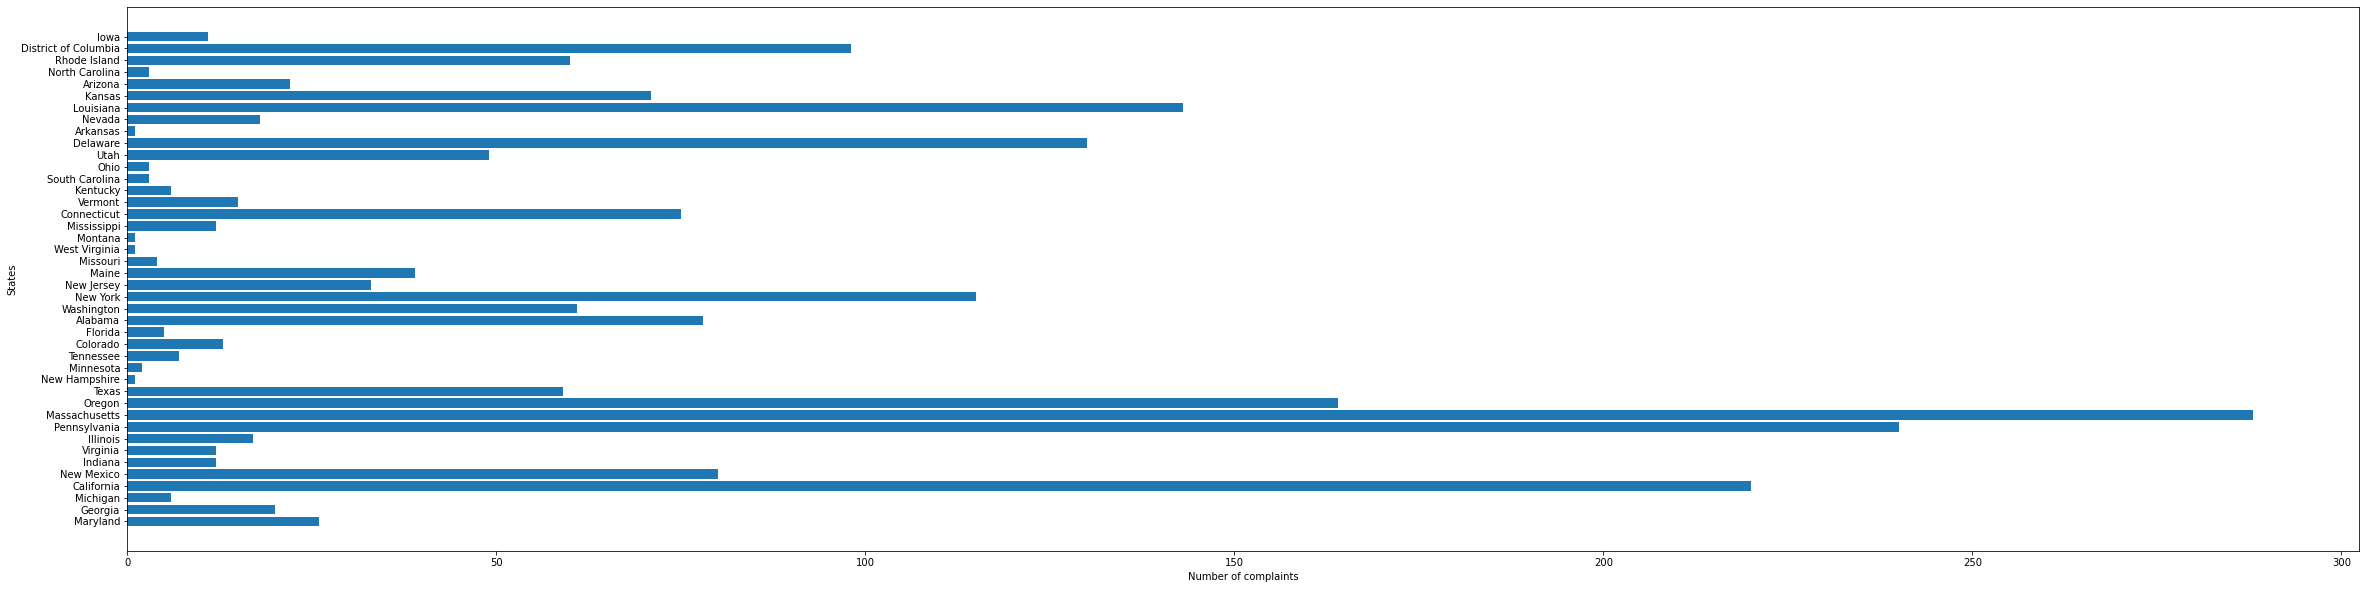

In [459]:
x3=df2['State'].unique()
y3=df2.groupby(['State'])['Customer Complaint'].count()
plt.figure(figsize=(40,10))
plt.barh(x3,y3)
plt.ylabel('States')
plt.xlabel('Number of complaints')
plt.savefig("Number of complaints vs States.jpg")

In [441]:
df2.groupby(['State'])['Customer Complaint'].count().max()

288

# Oregon has the highest number of complaints with about 288 

# Highest percentage of unresolved complaints

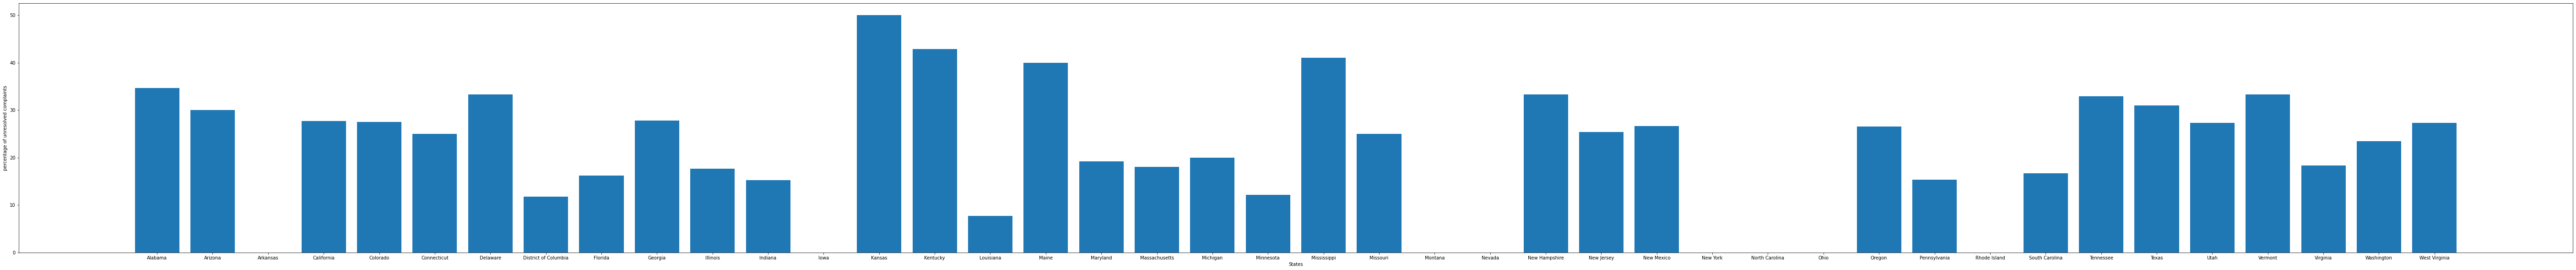

In [460]:
x4=df2['State'].unique()
s1=pd.Series(x4)
s1.sort_values(ascending=True,inplace=True)
y4=df2[df2['Status']=="Open"].groupby(['State'])['Customer Complaint'].count()*100/df2.groupby(['State'])['Customer Complaint'].count()
plt.figure(figsize=(100,10))
plt.bar(s1,y4)
plt.xlabel('States')
plt.ylabel('percentage of unresolved complaints')
plt.savefig("unresolved complaints vs states")


# Kansas has the highest number of unresolved complaints

# percentage as per recieved calls

In [443]:
df2

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Closed,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Closed,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Closed,No


In [444]:
filter13= df2['Status']=="Closed"
filter23=df2['Received Via']=="Internet"


# percentage of closed by requests by cutoemr care call

In [445]:
df2[(df2['Received Via']=="Customer Care Call") & (df2['Status']=="Closed")].groupby(['State'])['Received Via'].value_counts()*100/df2[filter13].groupby(['State'])['Received Via'].count()

State                 Received Via      
Alabama               Customer Care Call     41.176471
Arizona               Customer Care Call     35.714286
Arkansas              Customer Care Call     50.000000
California            Customer Care Call     52.201258
Colorado              Customer Care Call     58.620690
Connecticut           Customer Care Call     33.333333
Delaware              Customer Care Call     12.500000
District of Columbia  Customer Care Call     60.000000
Florida               Customer Care Call     52.238806
Georgia               Customer Care Call     46.153846
Illinois              Customer Care Call     42.222222
Indiana               Customer Care Call     56.000000
Kentucky              Customer Care Call     75.000000
Louisiana             Customer Care Call     66.666667
Maine                 Customer Care Call     66.666667
Maryland              Customer Care Call     57.142857
Massachusetts         Customer Care Call     64.000000
Michigan              Cu

# Percentage of closed which were received by internet

In [446]:
df2[(df2['Received Via']=="Internet") & (df2['Status']=="Closed")].groupby(['State'])['Received Via'].count()*100/df2[filter13].groupby(['State'])['Status'].count()

State
Alabama                  58.823529
Arizona                  64.285714
Arkansas                 50.000000
California               47.798742
Colorado                 41.379310
Connecticut              66.666667
Delaware                 87.500000
District of Columbia     40.000000
Florida                  47.761194
Georgia                  53.846154
Illinois                 57.777778
Indiana                  44.000000
Iowa                    100.000000
Kansas                  100.000000
Kentucky                 25.000000
Louisiana                33.333333
Maine                    33.333333
Maryland                 42.857143
Massachusetts            36.000000
Michigan                 60.869565
Minnesota                37.931034
Mississippi              56.521739
Missouri                 33.333333
Montana                 100.000000
Nevada                         NaN
New Hampshire            62.500000
New Jersey               46.428571
New Mexico               36.363636
New York      